#Logistik Biner

In [ ]:
#Membangkitkan Dataset
import numpy as np
import pandas as pd

# Membuat dataset
np.random.seed(0)
n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
y = (np.random.rand(n) > 0.5).astype(int)

# Dataset dalam bentuk DataFrame
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data.head()

,x1,x2,y
0,1.764052,1.883151,1
1,0.400157,-1.347759,0
2,0.978738,-1.270485,0
3,2.240893,0.969397,0
4,1.867558,-1.173123,0


In [ ]:
#Konstruksi Model
import statsmodels.api as sm

# Menambahkan konstanta untuk intercept
X = sm.add_constant(data[['x1', 'x2']])
y = data['y']

# Model logistik
model_log = sm.Logit(y, X).fit()
print(model_log.summary())


Optimization terminated successfully.
         Current function value: 0.681178
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                 0.01012
Time:                        17:13:47   Log-Likelihood:                -68.118
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                    0.4985
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2021      0.203     -0.994      0.320      -0.601       0.196
x1            -0.2097      0.

In [ ]:
#Uji Kelayakan Model (Hosmer and Lemeshow Test)
from scipy.stats import chi2

# Menghitung prediksi probabilitas
data['y_pred'] = model_log.predict(X)

# Membagi data ke dalam grup
data['group'] = pd.qcut(data['y_pred'], 10, labels=False)
observed = data.groupby('group')['y'].sum()
expected = data.groupby('group')['y_pred'].sum()

# Menghitung statistik chi-squared
hosmer_lemeshow_stat = ((observed - expected) ** 2 / expected).sum()
df = 8  # degree of freedom = jumlah grup - 2
p_value = chi2.sf(hosmer_lemeshow_stat, df)

print(f"Hosmer-Lemeshow Test Statistic: {hosmer_lemeshow_stat}")
print(f"P-value: {p_value}")


Hosmer-Lemeshow Test Statistic: 6.261721351063525
P-value: 0.6179409031502825


In [ ]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                 0.01012
Time:                        17:15:24   Log-Likelihood:                -68.118
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                    0.4985
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2021      0.203     -0.994      0.320      -0.601       0.196
x1            -0.2097      0.204     -1.027      0.304      -0.610       0.190
x2             0.1344      0.197      0.681      0.496      -0.252       0.521
==============================================================================
"""

In [ ]:
#Koefisien Determinasi (Nagelkerke R²)
import statsmodels.api as sm

null_model = sm.Logit(y, sm.add_constant(pd.DataFrame({'Intercept': [1] * n}))).fit()
# Access the log-likelihood value directly from the fitted model objects
pseudo_r_squared = 1 - (model_log.llf / null_model.llf)
print(f"Nagelkerke R²: {pseudo_r_squared}")

Optimization terminated successfully.
         Current function value: 0.688139
         Iterations 4
Nagelkerke R²: 0.010116064794474133


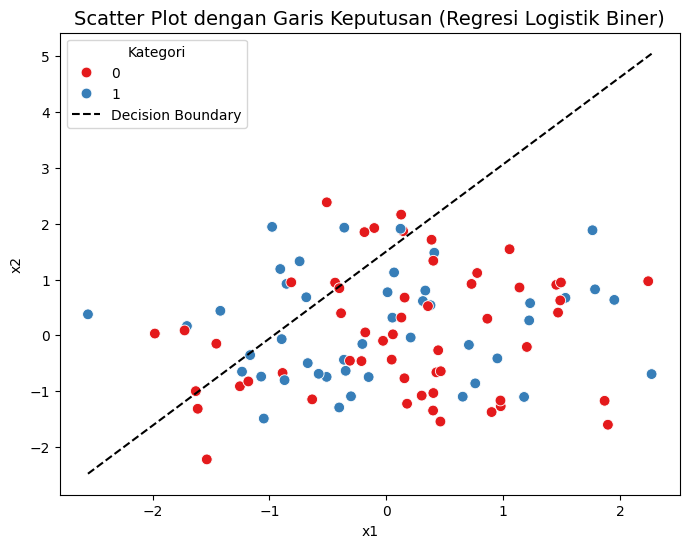

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['x1'], y=data['x2'], hue=data['y'], palette='Set1', s=60)

# Garis keputusan
x1_range = np.linspace(data['x1'].min(), data['x1'].max(), 100)
x2_decision = -(model_log.params['const'] + model_log.params['x1'] * x1_range) / model_log.params['x2']
plt.plot(x1_range, x2_decision, color='black', linestyle='--', label='Decision Boundary')

plt.title('Scatter Plot dengan Garis Keputusan (Regresi Logistik Biner)', fontsize=14)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(title='Kategori')
plt.show()


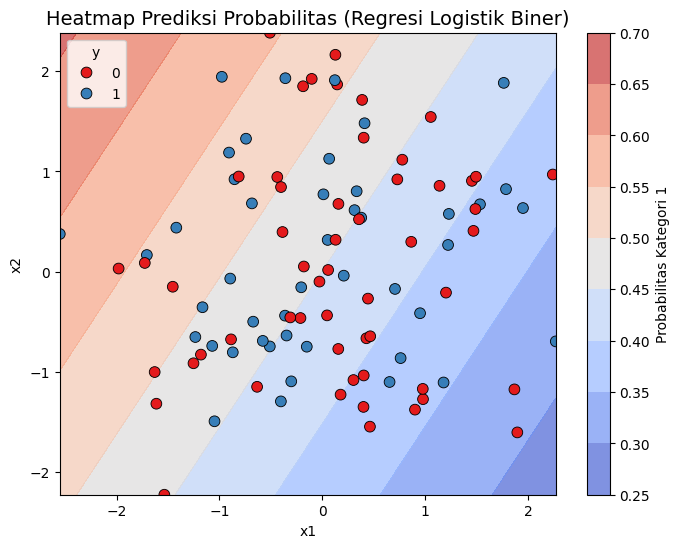

In [ ]:
# Membuat grid untuk probabilitas
x1_grid, x2_grid = np.meshgrid(
    np.linspace(data['x1'].min(), data['x1'].max(), 100),
    np.linspace(data['x2'].min(), data['x2'].max(), 100)
)
grid_data = pd.DataFrame({'x1': x1_grid.ravel(), 'x2': x2_grid.ravel()})
grid_data['prob'] = model_log.predict(sm.add_constant(grid_data[['x1', 'x2']]))

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.contourf(x1_grid, x2_grid, grid_data['prob'].values.reshape(100, 100), cmap='coolwarm', alpha=0.7)
sns.scatterplot(x=data['x1'], y=data['x2'], hue=data['y'], palette='Set1', s=60, edgecolor='k')
plt.title('Heatmap Prediksi Probabilitas (Regresi Logistik Biner)', fontsize=14)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Probabilitas Kategori 1')
plt.show()


#Logistik Multinomial

In [ ]:
# Membuat variabel y dengan 3 kategori
y_multi = np.random.choice([0, 1, 2], size=n, replace=True)
data_multi = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y_multi})

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model logistik multinomial
X_multi = data_multi[['x1', 'x2']]
y_multi = data_multi['y']

model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_multi, y_multi)
print(f"Intercept: {model_multi.intercept_}")
print(f"Coefficients: {model_multi.coef_}")


Intercept: [-0.15050376 -0.01466584  0.1651696 ]
Coefficients: [[-0.09349509 -0.01326286]
 [ 0.19637395 -0.10477552]
 [-0.10287886  0.11803838]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print(f"Coefficients: {model_multi.coef_}")

Coefficients: [[-0.09349509 -0.01326286]
 [ 0.19637395 -0.10477552]
 [-0.10287886  0.11803838]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-15-4b9f34553187>:19: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(


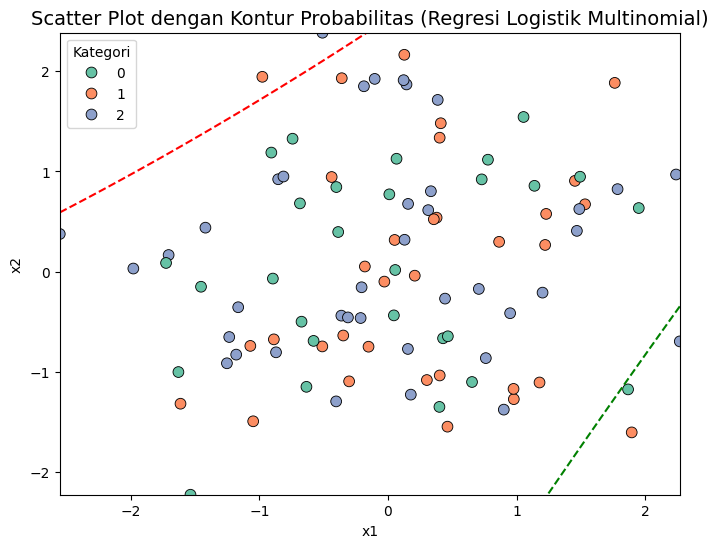

In [ ]:
from matplotlib.colors import ListedColormap

# Model multinomial prediksi probabilitas
probabilities = model_multi.predict_proba(X_multi)

# Membuat grid untuk probabilitas
x1_grid, x2_grid = np.meshgrid(
    np.linspace(data_multi['x1'].min(), data_multi['x1'].max(), 100),
    np.linspace(data_multi['x2'].min(), data_multi['x2'].max(), 100)
)
grid_probs = model_multi.predict_proba(np.c_[x1_grid.ravel(), x2_grid.ravel()])

# Plot scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_multi['x1'], y=data_multi['x2'], hue=data_multi['y'], palette='Set2', s=60, edgecolor='k')

# Kontur untuk setiap kelas
for i, label in enumerate(model_multi.classes_):
    plt.contour(
        x1_grid,
        x2_grid,
        grid_probs[:, i].reshape(100, 100),
        levels=[0.5],
        colors=['blue', 'green', 'red'][i],
        linestyles='--',
        label=f'Boundary for class {label}'
    )

plt.title('Scatter Plot dengan Kontur Probabilitas (Regresi Logistik Multinomial)', fontsize=14)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(title='Kategori')
plt.show()


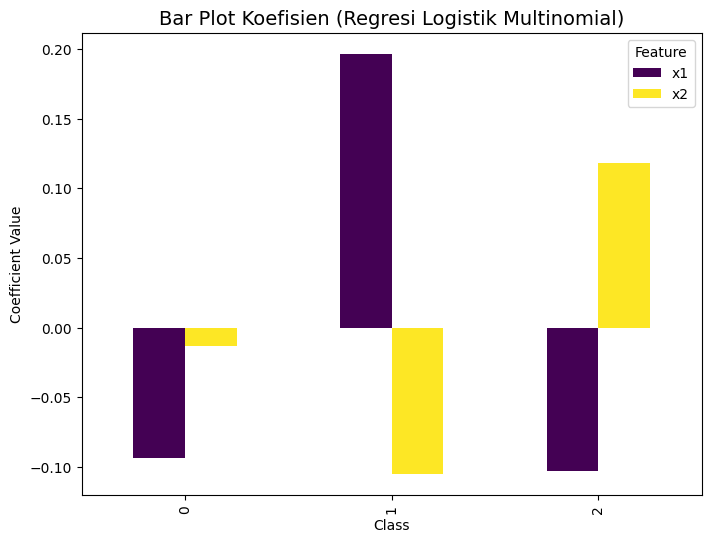

In [ ]:
# Menyusun data untuk visualisasi
coef_df = pd.DataFrame(model_multi.coef_, columns=['x1', 'x2'])
coef_df['Class'] = model_multi.classes_

# Bar plot
coef_df.set_index('Class').plot(kind='bar', figsize=(8, 6), cmap='viridis')
plt.title('Bar Plot Koefisien (Regresi Logistik Multinomial)', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Coefficient Value')
plt.legend(title='Feature')
plt.show()
